In [27]:
import tensorflow as tf
print(tf.__version__)

2.0.0


# The Sequential model API

 ## Coding tutorials
 #### [1. Building a Sequential model](#coding_tutorial_1)
 #### [2. Convolutional and pooling layers](#coding_tutorial_2)
 #### [3. The compile method](#coding_tutorial_3)
 #### [4. The fit method](#coding_tutorial_4)
 #### [5. The evaluate and predict methods](#coding_tutorial_5)

***
<a id="coding_tutorial_1"></a>
## Building a Sequential model

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Softmax

#### Build a feedforward neural network model

In [29]:
# Build the Sequential feedforward neural network model
model = Sequential([
    Flatten(input_shape = (28,28)),
    Dense(16, activation='relu'),
    Dense(16, activation='relu'),
    Dense(10, activation='softmax')
])

In [30]:
# Print the model summary

model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_8 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 16)                12560     
_________________________________________________________________
dense_10 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_11 (Dense)             (None, 10)                170       
Total params: 13,002
Trainable params: 13,002
Non-trainable params: 0
_________________________________________________________________


***
<a id="coding_tutorial_2"></a>
## Convolutional and pooling layers

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

#### Build a convolutional neural network model

In [39]:
# Build the Sequential convolutional neural network model

model = Sequential([Conv2D(filters=16, kernel_size=(3,3), padding='SAME', activation='relu', input_shape=(28,28,1), name='conv_1'),
                    MaxPooling2D(),
                    Conv2D(filters=10, kernel_size=(3,3), padding='SAME', activation='relu', name='conv_2'),
                    MaxPooling2D(),
                    Flatten(),
                    Dense(128, activation='relu', name='fc_1'),
                    Dense(32, activation='relu', name='fc_2'),
                    Dense(10, activation='softmax', name='softmax')
])

In [40]:
# Print the model summary

model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_1 (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv_2 (Conv2D)              (None, 14, 14, 10)        1450      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 7, 7, 10)          0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 490)               0         
_________________________________________________________________
fc_1 (Dense)                 (None, 128)               62848     
_________________________________________________________________
fc_2 (Dense)                 (None, 32)               

***
<a id="coding_tutorial_3"></a>
## The compile method

#### Compile the model

In [41]:
# Define the model optimizer, loss function and metrics

model.compile(
    optimizer='adam',  # 'adam', 'rmsprop', 'adadelta', 'sgd'
    loss='sparse_categorical_crossentropy',  # 'mean_squared_error', 'categorical_crossentropy')
    metrics=['accuracy']) # 'mae'

In [42]:
# Print the resulting model attributes

print(model.loss)
print(model.optimizer)
print(model.metrics)

sparse_categorical_crossentropy


***
<a id="coding_tutorial_4"></a>
## The fit method

In [43]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#### Load the data

In [44]:
# Load the Fashion-MNIST dataset

fashion_mnist_data = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist_data.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [45]:
# Print the shape of the training data

train_images.shape

(60000, 28, 28)

In [47]:
# Define the labels

labels = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'
]
print(train_labels[0])

9


In [48]:
# Rescale the image values so that they lie in between 0 and 1.

train_images = train_images / 255.
test_images = test_images / 255.

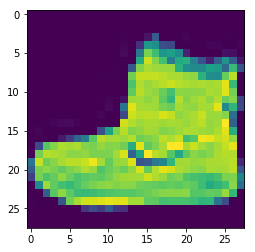

label: Ankle boot


In [50]:
# Display one of the images

i = 0
img = train_images[i, :, :]
plt.imshow(img)
plt.show()

print(f'label: {labels[train_labels[i]]}')

#### Fit the model

In [52]:
# Fit the model

model.fit(train_images[..., np.newaxis], train_labels, epochs=4, batch_size=128)

Train on 60000 samples
Epoch 1/4
60000/60000 [==============================] - 123s 2ms/sample - loss: 0.6666 - accuracy: 0.7563
Epoch 2/4
60000/60000 [==============================] - 120s 2ms/sample - loss: 0.4118 - accuracy: 0.8533
Epoch 3/4
60000/60000 [==============================] - 117s 2ms/sample - loss: 0.3573 - accuracy: 0.8727
Epoch 4/4
60000/60000 [==============================] - 117s 2ms/sample - loss: 0.3250 - accuracy: 0.8823


#### Plot training history

In [55]:
# Load the history into a pandas Dataframe

df = pd.DataFrame(model.history.history)
df

,loss,accuracy
0,0.666552,0.756300
1,0.411786,0.853350
2,0.357314,0.872667
3,0.324978,0.882283


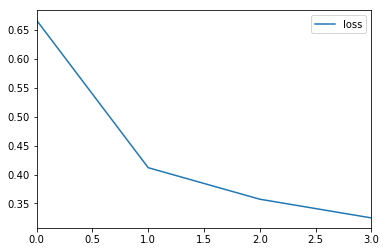

In [57]:
# Make a plot for the loss

df.plot(y='loss')

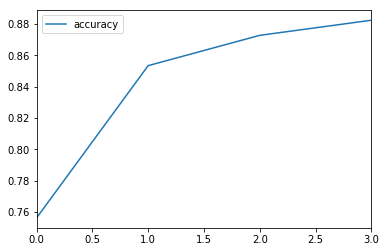

In [58]:
# Make a plot for the accuracy

df.plot(y='accuracy')

In [ ]:
# Make a plot for the additional metric



***
<a id="coding_tutorial_5"></a>
## The evaluate and predict methods

In [59]:
import matplotlib.pyplot as plt
import numpy as np

#### Evaluate the model on the test set

In [62]:
# Evaluate the model

model.evaluate(test_images[..., np.newaxis], test_labels, verbose=2)

10000/1 - 9s - loss: 0.3299 - accuracy: 0.8792


[0.34081441905498505, 0.8792]

#### Make predictions from the model

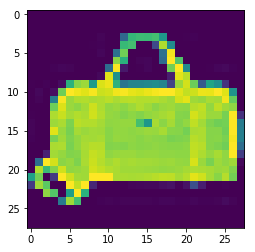

Label: Bag


In [71]:
# Choose a random test image

random_inx = np.random.choice(test_images.shape[0])

test_image = test_images[random_inx]
plt.imshow(test_image)
plt.show()
print(f"Label: {labels[test_labels[random_inx]]}")

In [72]:
# Get the model predictions

prediction = model.predict(test_image[np.newaxis, ..., np.newaxis])
labels[np.argmax(prediction)]

'Bag'